# Módulo 7 
**Presenta Juliho Castillo**

### Paso 1: Análisis de Datos con Pandas
Vamos a cargar el archivo "Iris.csv", y luego filtraremos los datos para obtener solo aquellos registros donde el ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5. Después, calcularemos la media, desviación estándar y la mediana (percentil 50) para el ancho del pétalo por cada tipo de flor.

In [17]:
import pandas as pd

# Cargar los datos
iris_data = pd.read_csv('Iris.csv')


In [18]:

# Calcular media, desviación estándar y mediana para el ancho del pétalo por tipo de flor
def agregate_data(data, column_name):
    return data.groupby('Species').agg(
        mean=(column_name, 'mean'),
        std=(column_name, 'std'),
        median=(column_name, 'median')
    ).reset_index()

In [19]:
agregate_data(iris_data, 'PetalWidthCm')

,Species,mean,std,median
0,Iris-setosa,0.244,0.107210,0.2
1,Iris-versicolor,1.326,0.197753,1.3
2,Iris-virginica,2.026,0.274650,2.0


In [20]:

# Filtrar los datos según los criterios dados
filtered_data = iris_data[(iris_data['SepalWidthCm'] >= 3.5) & (iris_data['SepalLengthCm'] > 5)]


In [21]:
agregate_data(filtered_data, 'PetalWidthCm')

,Species,mean,std,median
0,Iris-setosa,0.270588,0.098518,0.2
1,Iris-virginica,2.233333,0.251661,2.2


### Paso 2: Número de Registros
Calcularemos el número de registros que cumplen con los criterios del paso 1.

In [22]:
# Número de registros usados
num_records = filtered_data.shape[0]
num_records

20

### Paso 3: Estandarización de la Columna petal.width
Agregaremos una nueva columna al DataFrame que contendrá los valores estandarizados del ancho del pétalo, según la fórmula proporcionada.

In [24]:
# Añadir columna de ancho del pétalo estandarizado
filtered_data.loc[:,'petal_width_st'] = (filtered_data['PetalWidthCm'] - filtered_data['PetalWidthCm'].mean()) / filtered_data['PetalWidthCm'].std()
filtered_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,petal_width_st
count,20.000000,20.000000,20.000000,20.00000,20.000000,2.000000e+01
mean,38.900000,5.675000,3.800000,2.23000,0.565000,-3.330669e-17
std,37.496526,0.866253,0.240613,1.80645,0.729293,1.000000e+00
min,1.000000,5.100000,3.500000,1.20000,0.100000,-6.376037e-01
25%,16.750000,5.100000,3.675000,1.40000,0.200000,-5.004846e-01
50%,25.000000,5.400000,3.800000,1.50000,0.300000,-3.633656e-01
75%,45.500000,5.700000,3.900000,1.70000,0.400000,-2.262465e-01
max,132.000000,7.900000,4.400000,6.70000,2.500000,2.653254e+00


In [25]:
agregate_data(filtered_data, 'petal_width_st')

,Species,mean,std,median
0,Iris-setosa,-0.403695,0.135088,-0.500485
1,Iris-virginica,2.287603,0.345075,2.241897


### Paso 4: Renombramiento de Columnas
Modificaremos el DataFrame para mantener solo las columnas variety y petal.width.st, y las renombraremos a Variedad y Ancho Est. Pétalo, respectivamente.

In [28]:
final_data = filtered_data[['Species', 'petal_width_st']].rename(columns={
    'Species': 'Variedad',
    'petal_width_st': 'Ancho Est. Pétalo'
})

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 131
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variedad           20 non-null     object 
 1   Ancho Est. Pétalo  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [29]:
final_data.describe()

,Ancho Est. Pétalo
count,2.000000e+01
mean,-3.330669e-17
std,1.000000e+00
min,-6.376037e-01
25%,-5.004846e-01
50%,-3.633656e-01
75%,-2.262465e-01
max,2.653254e+00


### Paso 5: Exportación del DataFrame
Exportaremos el DataFrame final a un archivo denominado "Iris2.csv".

In [33]:
# Exportar el DataFrame corregido
final_data_path = 'Iris_corrected.csv'
final_data.to_csv(final_data_path, index=False)

## Paso 6: Gráfico de Dispersión
Generaremos un gráfico de dispersión para la base de datos original Iris que relacione petal.width con petal.length.

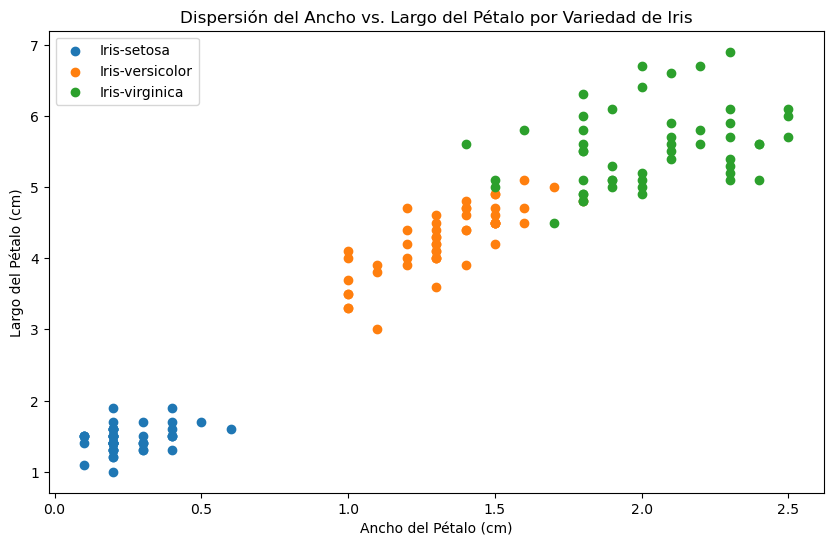

In [34]:
import matplotlib.pyplot as plt

# Generar el gráfico de dispersión para la base de datos original
plt.figure(figsize=(10, 6))
for species, group in iris_data.groupby('Species'):
    plt.scatter(group['PetalWidthCm'], group['PetalLengthCm'], label=species)

plt.title('Dispersión del Ancho vs. Largo del Pétalo por Variedad de Iris')
plt.xlabel('Ancho del Pétalo (cm)')
plt.ylabel('Largo del Pétalo (cm)')
plt.legend()
plt.show()